# Transformer Translate

# Setup & Import

In [ ]:
pathName      = "/content/drive/My Drive/" 
pathNameData  = pathName + "Datasets/" 
pathNameTrain = pathName + "DataTrain/"
prefix        = '_2022_'

In [ ]:
import tensorflow as tf
import numpy as np
import unicodedata
import re
import time

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget -O en-ru.tmx.gz http://opus.nlpl.eu/download.php?f=MultiUN/v1/tmx/en-ru.tmx.gz

--2021-09-15 13:16:07--  http://opus.nlpl.eu/download.php?f=MultiUN/v1/tmx/en-ru.tmx.gz
Resolving opus.nlpl.eu (opus.nlpl.eu)... 193.166.25.9
Connecting to opus.nlpl.eu (opus.nlpl.eu)|193.166.25.9|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://opus.nlpl.eu/download.php?f=MultiUN/v1/tmx/en-ru.tmx.gz [following]
--2021-09-15 13:16:08--  https://opus.nlpl.eu/download.php?f=MultiUN/v1/tmx/en-ru.tmx.gz
Connecting to opus.nlpl.eu (opus.nlpl.eu)|193.166.25.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://object.pouta.csc.fi/OPUS-MultiUN/v1/tmx/en-ru.tmx.gz [following]
--2021-09-15 13:16:09--  https://object.pouta.csc.fi/OPUS-MultiUN/v1/tmx/en-ru.tmx.gz
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1341957860 (1.2G) [application/gzip]
Savin

In [ ]:
!gzip -d /content/en-ru.tmx.gz

In [ ]:
path_out = pathNameData + 'en-ru.tmx'
!mv /content/en-ru.tmx '$path_out'

### Test reading big .tmx file

In [ ]:
!pip install pytmx

In [ ]:
!pip install pygame


     |████████████████████████████████| 11.8 MB 4.8 MB/s 


In [ ]:
import pygame
import threading
import pytmx
path_out = pathNameData + 'en-ru.tmx'
tiled_map = pytmx.TiledMap(path_out)

pygame 2.0.1 (SDL 2.0.14, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
path_out = pathNameData + 'en-ru.tmx'
import xml.etree.ElementTree as ET
import codecs
tree = ET.parse(path_out)
root = tree.getroot()
body = root[1]
print(len(body))
cnt=0
num_rows = 10
for item in body:
  if num_rows and cnt > num_rows:
    break
  try:
      bs = item[0][0].text
      zh = item[1][0].text
      bs = bs.decode('utf-8')
      zh = zh.decode('utf-8')
      print(zh + r' ||| ' + bs + '\n')
      #txtfile.write(zh + r' ||| ' + bs + '\n')
      cnt += 1
  except Exception as ex:
      print (ex.message)
      continue
      

In [ ]:
import xml.etree.ElementTree as ET
import codecs

def tmx_process(in_file, target_file, num_rows=None):

   tree = ET.parse(in_file)
   root = tree.getroot()
   body = root[1]

   txtfile = codecs.open(target_file, 'w+', 'utf-8')
   print(len(body))
   cnt=0
   for item in body:
      if num_rows and cnt > num_rows:
        break
      try:
         bs = item[0][0].text
         zh = item[1][0].text
         bs = bs.decode('utf-8')
         zh = zh.decode('utf-8')
         txtfile.write(zh + r' ||| ' + bs + '\n')
         cnt += 1
      except Exception as ex:
         print (ex.message)
         countinue

   txtfile.close()
   return 'Done'
tmx_process('/content/en-ru.tmx', 'en-ru.txt', num_rows=10)   

#### Beatifulsoap lxml

In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install lxml

In [ ]:
# Import BeautifulSoup
from bs4 import BeautifulSoup as bs
import lxml
path_out = pathNameData + 'en-ru.tmx'
content = []
# Read the XML file
# https://linuxhint.com/parse_xml_python_beautifulsoup/
with open(path_out, "r") as file:
    # Read each line in the file, readlines() returns a list of lines
    #content = file.readlines()
    flag = False
    for i in range(100):

    # Combine the lines in the list into a string
      loc_content_xml = file.readline()
      print(loc_content_xml)
      bs_content = bs(loc_content_xml, "lxml")
      loc_content_txt = bs_content.text.strip()
      if 'datatype="PlainText"' in loc_content_txt:
        flag = True
        # пропускаем служебные строчки
      if flag:
        print(loc_content_txt)      
      else:
        continue


In [ ]:
from bs4 import BeautifulSoup
import lxml

def readTMXfile(file_path, num_translates=None):
  inputs, targets = [], []
  with open(file_path, "r") as file:
    flag = False
    cnt = 0
    stopCondition = False
    flag_translate_line = False
    while not stopCondition:
      # Combine the lines in the list into a string
      loc_content_xml = file.readline()
      bs_content = bs(loc_content_xml, "lxml")
      loc_content_txt = bs_content.text.strip()
      loc_content_txt.replace(u'\xa0',"")
      if flag:
           
        if len(loc_content_txt)>0:
          #print(loc_content_txt)
          if not flag_translate_line:
            flag_translate_line = True
            inputs.append(loc_content_txt)
          else:
            flag_translate_line = False
            targets.append(loc_content_txt)
            cnt += 1
            print()

      else:
        if 'datatype="PlainText"' in loc_content_txt:
          flag = True
        # пропускаем служебные строчки
        continue
      if num_translates and cnt>=num_translates:
        #break
        stopCondition = True

  return inputs, targets
  
inputs, targets = readTMXfile(pathNameData + 'en-ru.tmx', num_translates=10)
list(zip(inputs[-10:], targets[-10:]))

[('Joint ECE/Eurostat/OECD Meeting on the Management of Statistical Information Systems (MSIS)',
  'Совместное совещание ЕЭК/Евростата/ОЭСР по вопросам управления статистическими информационными системами (УСИС)'),
 ('(Bratislava, Slovakia, 18-20 April 2005)',
  '(Братислава, Словакия, 18-20\xa0апреля 2005\xa0года)'),
 ('INFORMATION TECHNOLOGY GOVERNANCE @ ONS - DO WE NEED IT GOVERNANCE IN A STATISTICAL OFFICE?',
  'УПРАВЛЕНИЕ ИНФОРМАЦИОННОЙ ТЕХНОЛОГИЕЙ В УНС\xa0-'),
 ('Availability of and access to sound, relevant statistics enable timely and effective decision making by government, community and business.',
  'Наличие надежной и релевантной статистики и доступа к ней позволяет своевременно и эффективно принимать решения на уровне правительства, общин и предприятий.'),
 ('This in turn provides competitive advantage in economic performance, political and social stability and cultural development.',
  'Это в свою очередь обеспечивает конкурентные преимущества с точки зрения эффективност

### Test reading big .tmx file - end

## Parse tmx file

In [ ]:
!pip install beautifulsoup4
!pip install lxml

In [ ]:
from bs4 import BeautifulSoup as bs
import lxml

def readTMXfile(file_path, num_translates=None):
  inputs, targets = [], []
  with open(file_path, "r") as file:
    flag = False
    cnt = 0
    stopCondition = False
    flag_translate_line = False
    while not stopCondition:
      # Combine the lines in the list into a string
      loc_content_xml = file.readline()
      bs_content = bs(loc_content_xml, "lxml")
      loc_content_txt = bs_content.text.strip()
      loc_content_txt.replace(u'\xa0',"")
      loc_content_txt.replace('\xa0',"")
      if flag:
           
        if len(loc_content_txt)>0:
          print(loc_content_txt)
          if not flag_translate_line:
            flag_translate_line = True
            inputs.append(loc_content_txt)
          else:
            flag_translate_line = False
            targets.append(loc_content_txt)
            cnt += 1
            print()

      else:
        if 'datatype="PlainText"' in loc_content_txt:
          flag = True
        # пропускаем служебные строчки
        continue
      if num_translates and cnt>=num_translates:
        #break
        stopCondition = True

  return inputs, targets
  
inputs, targets = readTMXfile(pathNameData + 'en-ru.tmx', num_translates=10)
list(zip(inputs[-10:], targets[-10:]))

In [ ]:
inputs, targets = readTMXfile(pathNameData + 'en-ru.tmx', num_translates=2000)
# ограничимся 2000-ми строк

In [ ]:
print(len(inputs), len(targets))

2000 2000


In [ ]:
list(zip(inputs[-10:], targets[-10:]))

[('The second recommendation is that there should be increased cooperation between the United Nations and relevant international organizations, such as the World Customs Organization and the International Civil Aviation Organization.',
  'Вторая рекомендация касается необходимости расширения сотрудничества между Организацией Объединенных Наций и соответствующими международными организациями, в частности, со Всемирной таможенной организацией и Международной организацией гражданской авиации.'),
 ('Thirdly, Switzerland is convinced that close cooperation between the United Nations and Interpol is of crucial importance for the efficient identification and tracing of illicit small arms and light weapons.',
  'В-третьих, Швейцария убеждена, что тесное сотрудничество между Организацией Объединенных Наций и Интерполом имеет решающее значение для эффективной идентификации и отслеживания незаконного стрелкового оружия и легких вооружений.'),
 ('Ties with Interpol could be strengthened by assigni

In [ ]:
list(zip(inputs[:10], targets[:10]))

[('Joint ECE/Eurostat/OECD Meeting on the Management of Statistical Information Systems (MSIS)',
  'Совместное совещание ЕЭК/Евростата/ОЭСР по вопросам управления статистическими информационными системами (УСИС)'),
 ('(Bratislava, Slovakia, 18-20 April 2005)',
  '(Братислава, Словакия, 18-20\xa0апреля 2005\xa0года)'),
 ('INFORMATION TECHNOLOGY GOVERNANCE @ ONS - DO WE NEED IT GOVERNANCE IN A STATISTICAL OFFICE?',
  'УПРАВЛЕНИЕ ИНФОРМАЦИОННОЙ ТЕХНОЛОГИЕЙ В УНС\xa0-'),
 ('Availability of and access to sound, relevant statistics enable timely and effective decision making by government, community and business.',
  'Наличие надежной и релевантной статистики и доступа к ней позволяет своевременно и эффективно принимать решения на уровне правительства, общин и предприятий.'),
 ('This in turn provides competitive advantage in economic performance, political and social stability and cultural development.',
  'Это в свою очередь обеспечивает конкурентные преимущества с точки зрения эффективност

### Analyse Data

In [ ]:
import pandas as pd
df_i = pd.DataFrame(inputs)
df_t = pd.DataFrame(targets)
df_i.head()

,0
0,Joint ECE/Eurostat/OECD Meeting on the Managem...
1,"(Bratislava, Slovakia, 18-20 April 2005)"
2,INFORMATION TECHNOLOGY GOVERNANCE @ ONS - DO W...
3,"Availability of and access to sound, relevant ..."
4,This in turn provides competitive advantage in...


In [ ]:
df_t.head()

,0
0,Совместное совещание ЕЭК/Евростата/ОЭСР по воп...
1,"(Братислава, Словакия, 18-20 апреля 2005 года)"
2,УПРАВЛЕНИЕ ИНФОРМАЦИОННОЙ ТЕХНОЛОГИЕЙ В УНС -
3,Наличие надежной и релевантной статистики и до...
4,Это в свою очередь обеспечивает конкурентные п...


#### Test null values

In [ ]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df_i)

,0


In [ ]:
nans(df_t)

,0


## Prepare Dataset

### Normalize, ading tags

In [ ]:
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')


def normalize_rus_string(s):
    s = unicode_to_ascii(s)
    s = re.sub(r'([!.?])', r' \1', s)
    s = re.sub(r'[^а-яА-Я.!?]+', r' ', s)
    s = re.sub(r'\s+', r' ', s)
    s = s.replace(u'\xa0',"")
    return s
def normalize_lat_string(s):
    s = unicode_to_ascii(s)
    s = re.sub(r'([!.?])', r' \1', s)
    s = re.sub(r'[^a-zA-Z.!?]+', r' ', s)
    s = re.sub(r'\s+', r' ', s)
    s = s.replace(u'\xa0',"")
    return s    

In [ ]:
#raw_data_in, raw_data_tar = list(zip(*raw_data))
num_rows = 2000

raw_data_in, raw_data_tar = inputs[:num_rows], targets[:num_rows]
raw_data_in = [normalize_lat_string(data) for data in raw_data_in]
raw_data_tar_in = ['<start> ' + normalize_rus_string(data) for data in raw_data_tar]
raw_data_tar_out = [normalize_rus_string(data) + ' <end>' for data in raw_data_tar]

In [ ]:
raw_data_in[:10]
#raw_data_tar_in[:10]
#raw_data_tar_out[:10]
#inputs[:num_rows]
#targets[:num_rows]

['Joint ECE Eurostat OECD Meeting on the Management of Statistical Information Systems MSIS ',
 ' Bratislava Slovakia April ',
 'INFORMATION TECHNOLOGY GOVERNANCE ONS DO WE NEED IT GOVERNANCE IN A STATISTICAL OFFICE ?',
 'Availability of and access to sound relevant statistics enable timely and effective decision making by government community and business .',
 'This in turn provides competitive advantage in economic performance political and social stability and cultural development .',
 'Technology plays a critical role in this scenario by providing an environment for the creation of quality data and the subsequent means of its dissemination as valuable information to stakeholders .',
 'At the Office for National Statistics ONS we believe that we need to achieve and maintain the above demands by improving public confidence in the integrity and validity of our outputs .',
 'We have embarked on a modernization programme of our statistical processes which will provide us with a high deg

### Prepare sequences

In [ ]:
%%time
in_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
in_tokenizer.fit_on_texts(raw_data_in)
data_in = in_tokenizer.texts_to_sequences(raw_data_in)
data_in = tf.keras.preprocessing.sequence.pad_sequences(data_in,
                                                        padding='post')

tar_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tar_tokenizer.fit_on_texts(raw_data_tar_in)
tar_tokenizer.fit_on_texts(raw_data_tar_out)
data_tar_in = tar_tokenizer.texts_to_sequences(raw_data_tar_in)
data_tar_in = tf.keras.preprocessing.sequence.pad_sequences(data_tar_in,
                                                           padding='post')

data_tar_out = tar_tokenizer.texts_to_sequences(raw_data_tar_out)
data_tar_out = tf.keras.preprocessing.sequence.pad_sequences(data_tar_out,
                                                            padding='post')

CPU times: user 424 ms, sys: 38.2 ms, total: 462 ms
Wall time: 440 ms


In [ ]:
data_in.shape, data_tar_in.shape, data_tar_out.shape

((2000, 207), (2000, 141), (2000, 141))

In [ ]:
tar_tokenizer.word_index['<start>'], tar_tokenizer.word_index['<end>']

(4, 5)

### Save Load Data

In [ ]:
# Save
import pickle
with open(pathNameTrain + prefix + 'data_in', 'wb') as handle:
  pickle.dump(data_in, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(pathNameTrain + prefix + 'data_tar_in', 'wb') as handle:
  pickle.dump(data_tar_in, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(pathNameTrain + prefix + 'data_tar_out', 'wb') as handle:
  pickle.dump(data_tar_out, handle, protocol=pickle.HIGHEST_PROTOCOL)  
with open(pathNameTrain + prefix + 'in_tokenizer', 'wb') as handle:
  pickle.dump(in_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(pathNameTrain + prefix + 'tar_tokenizer', 'wb') as handle:
  pickle.dump(tar_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(pathNameTrain + prefix + 'inputs', 'wb') as handle:
  pickle.dump(inputs, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(pathNameTrain + prefix + 'targets', 'wb') as handle:
  pickle.dump(targets, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load
import pickle
with open(pathNameTrain + prefix + 'data_in', 'rb') as handle:
  data_in = pickle.load(handle)
with open(pathNameTrain + prefix + 'data_tar_in', 'rb') as handle:
  data_tar_in = pickle.load(handle)
with open(pathNameTrain + prefix + 'data_tar_out', 'rb') as handle:
  data_tar_out = pickle.load(handle)
with open(pathNameTrain + prefix + 'in_tokenizer', 'rb') as handle:
  in_tokenizer = pickle.load(handle)
with open(pathNameTrain + prefix + 'tar_tokenizer', 'rb') as handle:
  tar_tokenizer = pickle.load(handle)  
with open(pathNameTrain + prefix + 'inputs', 'rb') as handle:
  inputs = pickle.load(handle)  
with open(pathNameTrain + prefix + 'targets', 'rb') as handle:
  targets = pickle.load(handle)      

### Create dataset

In [ ]:
BATCH_SIZE = 5
dataset = tf.data.Dataset.from_tensor_slices(
    (data_in, data_tar_in, data_tar_out))
dataset = dataset.shuffle(20).batch(BATCH_SIZE)

## Prepare Data for Model

### Hyper Params

In [ ]:
in_vocab_size = len(in_tokenizer.word_index) + 1
print('Input vocabulary size', in_vocab_size)
tar_vocab_size = len(tar_tokenizer.word_index) + 1
print('Target vocabulary size', tar_vocab_size)

max_len_tar = data_tar_in.shape[1]
print('Target max len', max_len_tar)

Input vocabulary size 4294
Target vocabulary size 8154
Target max len 141


### Positinal embedding (encoding reaльно)

In [ ]:
def positional_embedding(pos, hidden_dim):
    PE = np.zeros((1, hidden_dim))
    for i in range(hidden_dim):
        if i % 2 == 0:
            PE[:, i] = np.sin(pos / 10000 ** (i / hidden_dim))
        else:
            PE[:, i] = np.cos(pos / 10000 ** ((i - 1) / hidden_dim))
    return PE

max_length = max(len(data_in[0]), len(data_tar_in[0]))
HIDDEN_DIM = 128

pes = []
for i in range(max_length):
    pes.append(positional_embedding(i, HIDDEN_DIM))

pes = np.concatenate(pes, axis=0)
pes = tf.constant(pes, dtype=tf.float32)
max_length

207

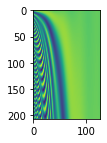

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,2))
plt.imshow(pes.numpy())
plt.show()

# Create model


### MultiHeadAttention

In [ ]:
class MultiHeadAttention(tf.keras.Model):
    def __init__(self, hidden_dim, h):
        super(MultiHeadAttention, self).__init__()
        self.key_size = hidden_dim // h
        self.h = h
        self.wq = tf.keras.layers.Dense(hidden_dim) #замена [tf.keras.layers.Dense(key_size) for _ in range(h)]
        self.wk = tf.keras.layers.Dense(hidden_dim) #замена [tf.keras.layers.Dense(key_size) for _ in range(h)]
        self.wv = tf.keras.layers.Dense(hidden_dim) #замена [tf.keras.layers.Dense(value_size) for _ in range(h)]
        self.wo = tf.keras.layers.Dense(hidden_dim)
    
    def call(self, decoder_output, encoder_output, mask=None):
        
        
        query = self.wq(decoder_output)
        key = self.wk(encoder_output)
        value = self.wv(encoder_output)
        
        # Разделяем для multihead attention
        batch_size = query.shape[0]
        query = tf.reshape(query, [batch_size, -1, self.h, self.key_size])
        query = tf.transpose(query, [0, 2, 1, 3])
        key = tf.reshape(key, [batch_size, -1, self.h, self.key_size])
        key = tf.transpose(key, [0, 2, 1, 3])
        value = tf.reshape(value, [batch_size, -1, self.h, self.key_size])
        value = tf.transpose(value, [0, 2, 1, 3])
        
        score = tf.matmul(query, key, transpose_b=True) / tf.math.sqrt(tf.dtypes.cast(self.key_size, dtype=tf.float32))
        
        if mask is not None:
            score *= mask
            score = tf.where(tf.equal(score, 0), tf.ones_like(score) * -1e9, score)
        
        a = tf.nn.softmax(score, axis=-1)
        context = tf.matmul(a, value)
        context = tf.transpose(context, [0, 2, 1, 3])
        context = tf.reshape(context, [batch_size, -1, self.key_size * self.h])
        
        heads = self.wo(context)
        return heads

## Encoder

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, hidden_dim, num_layers, h):
        super(Encoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.h = h
        self.embedding = tf.keras.layers.Embedding(vocab_size, hidden_dim)
        self.attention = [MultiHeadAttention(hidden_dim, h) for _ in range(num_layers)]

        self.attention_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]

        self.dense_1 = [tf.keras.layers.Dense(512, activation='relu') for _ in range(num_layers)]
        self.dense_2 = [tf.keras.layers.Dense(hidden_dim) for _ in range(num_layers)]
        self.ffn_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]

    def call(self, sequence, padding_mask=None):
        embed_out = self.embedding(sequence)
        # ускорение применяем embeding сразу ко всем без цикла 
        embed_out += pes[:sequence.shape[1], :]
        
        # Средний блок внимания - внимание на себя с макировкой
        sub_in = embed_out
        
        # маскирование на остаток не слов и они вляить не будут
        for i in range(self.num_layers):
            sub_out = self.attention[i](sub_in, sub_in, padding_mask)
            sub_out = sub_in + sub_out
            sub_out = self.attention_norm[i](sub_out)
            
            ffn_in = sub_out

            ffn_out = self.dense_2[i](self.dense_1[i](ffn_in))
            ffn_out = ffn_in + ffn_out
            ffn_out = self.ffn_norm[i](ffn_out)

            sub_in = ffn_out
            
        return ffn_out

## Decoder

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, hidden_dim, num_layers, h):
        super(Decoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.h = h
        self.embedding = tf.keras.layers.Embedding(vocab_size, hidden_dim)
        self.attention_bot = [MultiHeadAttention(hidden_dim, h) for _ in range(num_layers)]
        self.attention_bot_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]
        self.attention_mid = [MultiHeadAttention(hidden_dim, h) for _ in range(num_layers)]
        self.attention_mid_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]
        
        self.dense_1 = [tf.keras.layers.Dense(512, activation='relu') for _ in range(num_layers)]
        self.dense_2 = [tf.keras.layers.Dense(hidden_dim) for _ in range(num_layers)]
        self.ffn_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]
        
        self.dense = tf.keras.layers.Dense(vocab_size)
        
    def call(self, sequence, encoder_output, padding_mask=None):
        # Эмбеддинги
        embed_out = self.embedding(sequence)
        embed_out += pes[:sequence.shape[1], :]
        
        bot_sub_in = embed_out
        # неt циrлла по головам (есть доп ось по -кой все вычисляется) и есть маскирование
        # маска генерится во время обучниея
        for i in range(self.num_layers):
            # Нижний блок внимания
            # Нижний блок внимания - типа(?)  внимание на себя
            seq_len = bot_sub_in.shape[1]
            look_left_only_mask = tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
            bot_sub_out = self.attention_bot[i](bot_sub_in, bot_sub_in, look_left_only_mask)
            bot_sub_out = bot_sub_in + bot_sub_out
            bot_sub_out = self.attention_bot_norm[i](bot_sub_out)
            
            # Верхний блок внимания
            # я - Средний блок внимания - внимание на себя с макировкой
            mid_sub_in = bot_sub_out

            mid_sub_out = self.attention_mid[i](mid_sub_in, encoder_output, padding_mask)
            mid_sub_out = mid_sub_out + mid_sub_in
            mid_sub_out = self.attention_mid_norm[i](mid_sub_out)

            # Полносвязный слой
            ffn_in = mid_sub_out

            ffn_out = self.dense_2[i](self.dense_1[i](ffn_in))
            ffn_out = ffn_out + ffn_in
            ffn_out = self.ffn_norm[i](ffn_out)

            bot_sub_in = ffn_out
        
        logits = self.dense(ffn_out)
            
        return logits

## Loss

In [ ]:
crossentropy = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)
def loss_func(targets, logits):
    # дополнительное маскирование
    mask = tf.math.logical_not(tf.math.equal(targets, 0))
    mask = tf.cast(mask, dtype=tf.int64)
    loss = crossentropy(targets, logits, sample_weight=mask)
  
    return loss


optimizer = tf.keras.optimizers.Adam()

## Train step

In [ ]:
@tf.function
def train_step(source_seq, target_seq_in, target_seq_out):
    with tf.GradientTape() as tape:
        padding_mask = 1 - tf.cast(tf.equal(source_seq, 0), dtype=tf.float32)
        padding_mask = tf.expand_dims(padding_mask, axis=1)
        padding_mask = tf.expand_dims(padding_mask, axis=1)
        encoder_output = encoder(source_seq, padding_mask)
        
        decoder_output = decoder(target_seq_in, encoder_output, padding_mask)

        loss = loss_func(target_seq_out, decoder_output)

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    return loss

#### Predict - functional

In [ ]:
def predict(test_source_text=None):
    if test_source_text is None:
        test_source_text = raw_data_in[np.random.choice(len(raw_data_in))]
    print(test_source_text)
    test_source_seq = in_tokenizer.texts_to_sequences([test_source_text])
    print(test_source_seq)

    en_output = encoder(tf.constant(test_source_seq))

    de_input = tf.constant([[tar_tokenizer.word_index['<start>']]], dtype=tf.int64)

    out_words = []

    while True:
        de_output = decoder(de_input, en_output)
        new_word = tf.expand_dims(tf.argmax(de_output, -1)[:, -1], axis=1)
        out_words.append(tar_tokenizer.index_word[new_word.numpy()[0][0]])

        de_input = tf.concat((de_input, new_word), axis=-1)

        if out_words[-1] == '<end>' or len(out_words) >= max_len_tar:
            break

    print((' '.join(out_words)).replace('<end>',''))
    return (' '.join(out_words).replace('<end>',''))

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
from googletrans import Translator
translator = Translator()
translator.translate('vous avez besoin de faire cela tous les trois').text

'you need to do this all three'

# Train Model

In [ ]:
H = 8
NUM_LAYERS = 1

encoder = Encoder(in_vocab_size, HIDDEN_DIM, NUM_LAYERS, H)

in_sequence_in = tf.constant([[1, 2, 3, 4, 6, 7, 8, 0, 0, 0], 
                           [1, 2, 3, 4, 6, 7, 8, 0, 0, 0]])
encoder_output = encoder(in_sequence_in)

print('Encoder input shape', in_sequence_in.shape)
print('Encoder output shape', encoder_output.shape)

decoder = Decoder(tar_vocab_size, HIDDEN_DIM, NUM_LAYERS, H)

tar_sequence_in = tf.constant([[1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 0, 0, 0, 0],
                           [1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 0, 0, 0, 0]])
decoder_output = decoder(tar_sequence_in, encoder_output)

print('Decoder input shape', tar_sequence_in.shape)
print('Decoder output shape', decoder_output.shape)

Encoder input shape (2, 10)
Encoder output shape (2, 10, 128)
Decoder input shape (2, 14)
Decoder output shape (2, 14, 8154)


In [ ]:
encoder = Encoder(in_vocab_size, HIDDEN_DIM, NUM_LAYERS, H)
decoder = Decoder(tar_vocab_size, HIDDEN_DIM, NUM_LAYERS, H)

NUM_EPOCHS = 100

start_time = time.time()
for e in range(NUM_EPOCHS):
    for batch, (source_seq, target_seq_in, target_seq_out) in enumerate(dataset.take(-1)):
        loss = train_step(source_seq, target_seq_in,
                          target_seq_out)

    print('Epoch {} Loss {:.8f}'.format(
          e + 1, loss.numpy()))

    if (e + 1) % 10 == 0:
        end_time = time.time()
        print('Среднее время: {:.2f}s'.format((end_time - start_time) / (e + 1)))
        try:
            predict()
        except Exception as e:
            print(e)
            continue

Epoch 1 Loss 1.69907367
Epoch 2 Loss 0.74874920
Epoch 3 Loss 0.88577032
Epoch 4 Loss 1.04521775
Epoch 5 Loss 0.98626596
Epoch 6 Loss 0.56154609
Epoch 7 Loss 0.73646510
Epoch 8 Loss 0.54190153
Epoch 9 Loss 0.45646781
Epoch 10 Loss 0.40918964
Среднее время: 9.14s
We recognize the presence of Ms . Yoriko Kawaguchi in our midst today in the Council .
[[31, 2709, 1, 2053, 2, 828, 4, 2018, 829, 6, 101, 2076, 420, 6, 1, 21, 4]]
мы располагаем управляющих эмбарго за правил насколько мне серии имеет решающее значение . <end>
Epoch 11 Loss 0.27747625
Epoch 12 Loss 0.33869484
Epoch 13 Loss 0.30773076
Epoch 14 Loss 0.24937932
Epoch 15 Loss 0.13645360
Epoch 16 Loss 0.15645239
Epoch 17 Loss 0.11447295
Epoch 18 Loss 0.10238178
Epoch 19 Loss 0.13621739
Epoch 20 Loss 0.10684338
Среднее время: 8.99s
Class Packing group I of classification code CT .
[[146, 418, 75, 63, 2, 292, 108, 1645, 4]]
эффективные глобальные меры в ответ на аннаном соотношениями . <end>
Epoch 21 Loss 0.06105114
Epoch 22 Loss 0.0847

In [ ]:
# Попробуем добиться точности до loss = 0.0001
UM_EPOCHS = 100

start_time = time.time()
for e in range(NUM_EPOCHS):
    for batch, (source_seq, target_seq_in, target_seq_out) in enumerate(dataset.take(-1)):
        loss = train_step(source_seq, target_seq_in,
                          target_seq_out)

    print('Epoch {} Loss {:.8f}'.format(
          e + 1, loss.numpy()))

    if (e + 1) % 10 == 0:
        end_time = time.time()
        print('Среднее время: {:.2f}s'.format((end_time - start_time) / (e + 1)))
        try:
            predict()
        except Exception as e:
            print(e)
            continue

Epoch 1 Loss 0.01342503
Epoch 2 Loss 0.00654744
Epoch 3 Loss 0.00144395
Epoch 4 Loss 0.01888485
Epoch 5 Loss 0.01523963
Epoch 6 Loss 0.01451406
Epoch 7 Loss 0.00425531
Epoch 8 Loss 0.00671598
Epoch 9 Loss 0.00221179
Epoch 10 Loss 0.01625595
Среднее время: 8.82s
The root cause of that problem can be removed only by reinforcing national legal systems and control mechanisms and by imposing strict controls on domestic production and trade in small arms and light weapons .
[[1, 2059, 1375, 2, 10, 372, 113, 16, 3993, 274, 11, 2425, 72, 246, 309, 3, 193, 522, 3, 11, 1682, 1427, 649, 9, 1344, 617, 3, 103, 6, 17, 12, 3, 29, 23, 4]]
коренная причина этои проблемы может быть устранена лишь путем укрепления национальных участвующих в осуществлении
Epoch 11 Loss 0.00616576
Epoch 12 Loss 0.00556841
Epoch 13 Loss 0.00389577
Epoch 14 Loss 0.01675448
Epoch 15 Loss 0.00148388
Epoch 16 Loss 0.00955453
Epoch 17 Loss 0.02361310
Epoch 18 Loss 0.01818097
Epoch 19 Loss 0.00644758
Epoch 20 Loss 0.00944372
Сред

### Predict

In [ ]:
test_sents = inputs[:20]

for test_sent in test_sents:
    test_sequence = normalize_lat_string(test_sent)
    text_predict = predict(test_sequence)
    print("googletrans:", translator.translate(text_predict, dest='en').text[:-5])
    print()

Joint ECE Eurostat OECD Meeting on the Management of Statistical Information Systems MSIS 
[[611, 126, 2778, 612, 66, 9, 1, 78, 2, 613, 47, 309, 2779]]
совместное совещание еэк евростата оэср по вопросам управления статистическими информационными системами усис 
googletrans: Joint EEC Eurostat OECD Meeting on the Management of Statistical Information Sy

 Bratislava Slovakia April 
[[2780, 1118, 614]]
братислава словакия апреля года 
googletrans: Bratislava Slovakia 

INFORMATION TECHNOLOGY GOVERNANCE ONS DO WE NEED IT GOVERNANCE IN A STATISTICAL OFFICE ?
[[47, 534, 394, 535, 833, 31, 140, 32, 394, 6, 7, 613, 252, 477]]
управление информационнои технологиеи в унс 
googletrans: information technology management a

Availability of and access to sound relevant statistics enable timely and effective decision making by government community and business .
[[908, 2, 3, 711, 5, 834, 125, 1119, 395, 478, 3, 173, 266, 835, 11, 332, 156, 3, 132, 4]]
наличие надежнои и релевантнои статистики и дос

# Вывод
1. Распарсен сложный (в смылсе нового формата и объема) входной файл
2. Прогнан pipeline по подготовке данных Transformer, созданию, обучению и использованию модели Transformer
3. Получены неплохие результаты - googletrans  тоже, похоже, согласен с этим)